In [1]:
import pydicom
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
filename = get_testdata_files("CT_small.dcm")[0]

In [3]:
ds = pydicom.dcmread(filename)

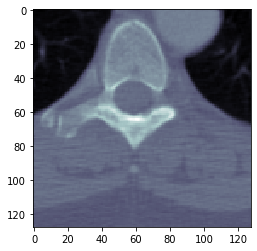

In [4]:
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [5]:
arr = ds.pixel_array
arr

array([[175, 180, 166, ..., 203, 207, 216],
       [186, 183, 157, ..., 181, 190, 239],
       [184, 180, 171, ..., 152, 164, 235],
       ...,
       [906, 910, 923, ..., 922, 929, 927],
       [914, 954, 938, ..., 942, 925, 905],
       [959, 955, 916, ..., 911, 904, 909]], dtype=int16)

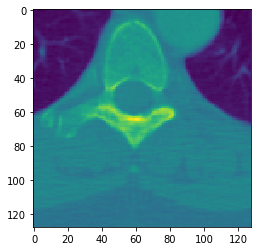

In [6]:
plt.imshow(arr)
plt.savefig('new_pic.jpg')

In [7]:
cv2.imwrite('my_file.png',arr)

True

In [8]:
import SimpleITK as sitk

img = sitk.ReadImage("CT_small.dcm")
# rescale intensity range from [-1000,1000] to [0,255]
img = sitk.IntensityWindowing(img, -1000, 1000, 0, 255)
# convert 16-bit pixels to 8-bit
img = sitk.Cast(img, sitk.sitkUInt8)

sitk.WriteImage(img, "new.png")